In [3]:
import imghdr#checks file extensions
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'#Use in case kernel dies

In [3]:
os.path.join('data','happy')

'data\\happy'

In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
data_dir=r"D:\ML(imp)\NOtes and projecTS\Image classification"

In [6]:
extensions=['jpeg','jpg','bmp','png']

In [7]:
os.listdir(data_dir)

['Happy', 'Sad']

In [8]:
os.listdir(os.path.join(data_dir,'happy'))#Gives all the images in happy folder

['05-12-21-happy-people.jpg',
 '1-2.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '613k1XcpYCL.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL._AC_UF10001000_QL80_.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'compassion-900x387.jpg',
 'dv2051009.jpg',
 'file-20230208-27-3jttof.jpg',
 'freedom-serenity-concept-female-model-ecstatic-enjoyment-mixed-race-34800382.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'Getty

In [9]:
def clean_images(data_dir,extensions):
    for image_class in os.listdir(data_dir):
        for image in os.listdir(os.path.join(data_dir,image_class)):
            image_path=os.path.join(data_dir,image_class,image)
            try:
                img=cv2.imread(image_path)
                tip=imghdr.what(image_path)
                if tip not in extensions:
                    print('Image not in extension list{}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print("Issue with image{}".format(image_path))
                

In [10]:
from pathlib import Path
image_extensions=['.jpeg','.jpg','.bmp','.png'] # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [11]:
clean_images(data_dir,extensions)

Loading Data

In [12]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [13]:
#Creates Data pipeline
data=tf.keras.utils.image_dataset_from_directory(r"D:\ML(imp)\NOtes and projecTS\Image classification")

Found 165 files belonging to 2 classes.


In [14]:
data=data.map(lambda x,y:(x/255.0,y))

In [15]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [16]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(16,(3,3),strides=1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [19]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [21]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 5s 832ms/step - loss: 1.1586 - accuracy: 0.4844 - val_loss: 0.7793 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 4s 712ms/step - loss: 0.6615 - accuracy: 0.6016 - val_loss: 0.5829 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 3s 693ms/step - loss: 0.6302 - accuracy: 0.5781 - val_loss: 0.5799 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 3s 680ms/step - loss: 0.5386 - accuracy: 0.7578 - val_loss: 0.5085 - val_accuracy: 0.6250
Epoch 5/20
4/4 [==============================] - 4s 739ms/step - loss: 0.5241 - accuracy: 0.7109 - val_loss: 0.5262 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 3s 668ms/step - loss: 0.4116 - accuracy: 0.8438 - val_loss: 0.3256 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 3s 717ms/step - loss: 0.3719 - accuracy: 0.8438 - val_loss: 0.2685 - val_accuracy: 0.9375
Epoch 8/20
4/4 [====

In [23]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()


In [24]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())


1/1 [==============================] - 0s 134ms/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [25]:
#Allows us to iterate over the data
#data_iter=data.as_numpy_iterator()

In [26]:
#batch=data_iter.next()
#batch

In [27]:
#batch[0].shape

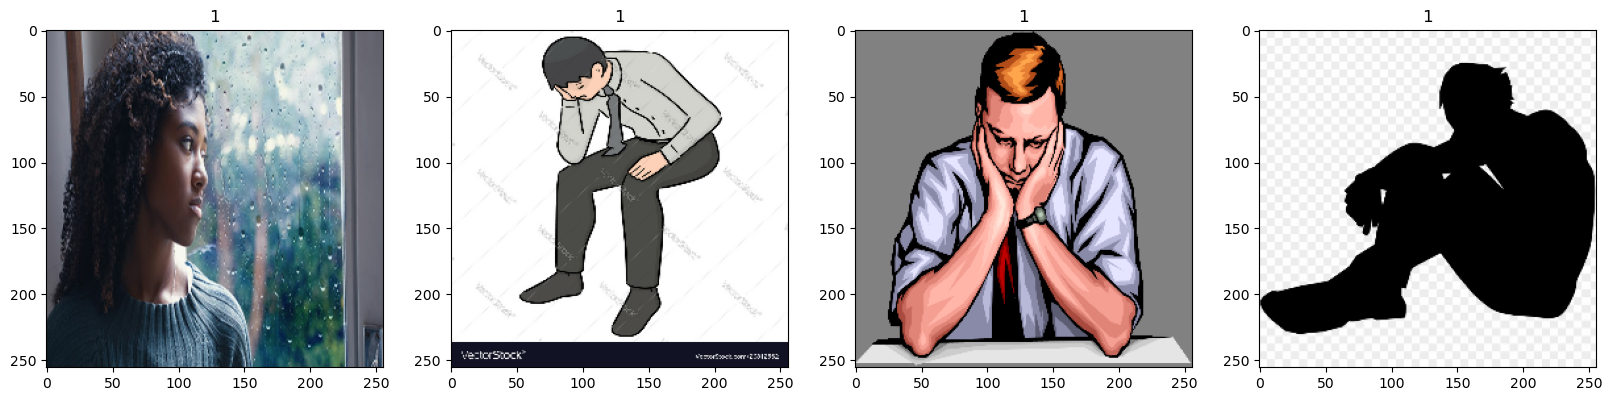

In [28]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    

In [29]:
#Next batch
#batch=data_iter.next()

Model

Train

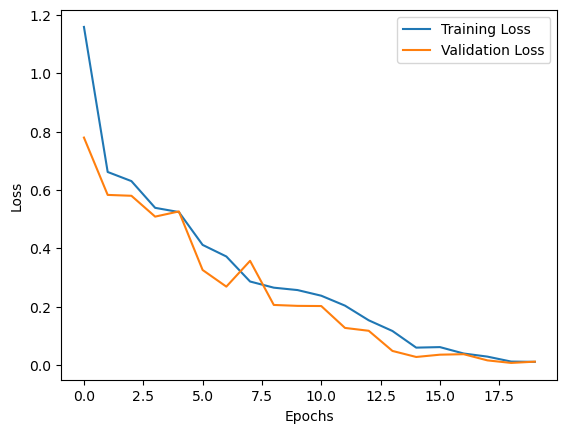

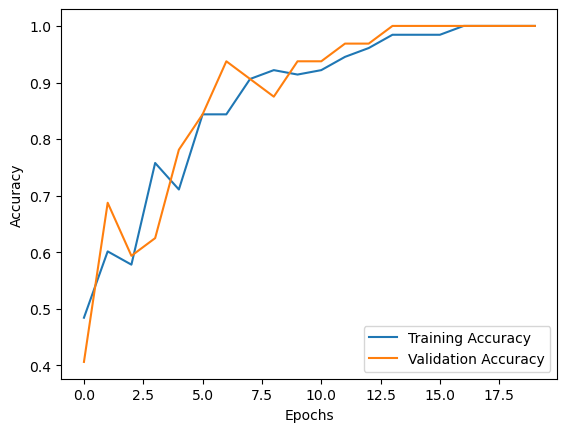

In [30]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


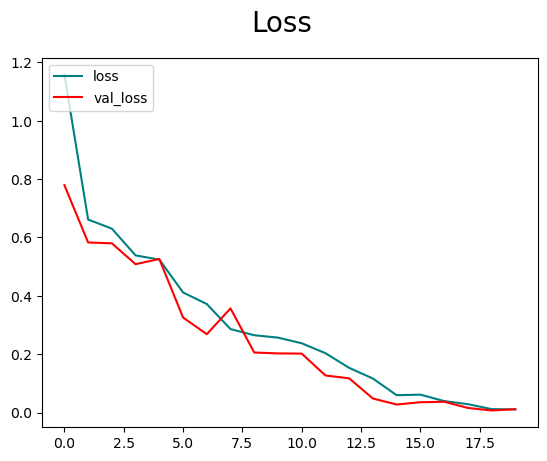

In [31]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

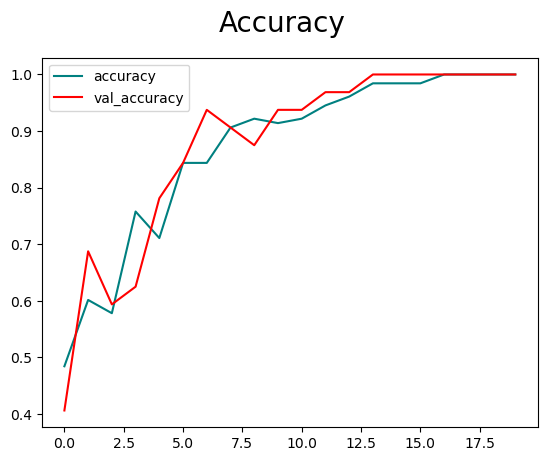

In [32]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

yhat2

In [33]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imgclassifier.h5'))

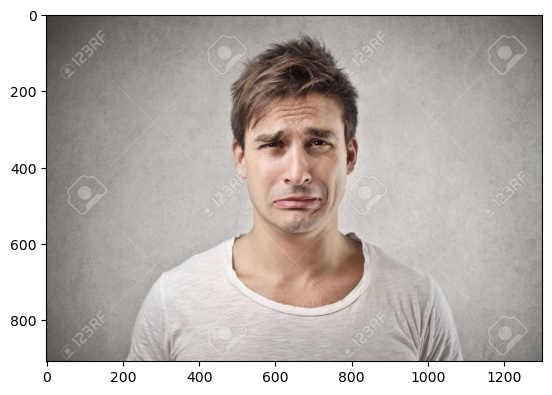

In [4]:
img = cv2.imread(r"C:\Users\PRATHAMESH MANDIYE\OneDrive\Desktop\Testing\sadtestt.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
def classify_image(image_path):
    # Load the trained model
    model = tf.keras.models.load_model(os.path.join('models','imgclassifier.h5'))  # Replace with your model path

    # Load and preprocess an image using cv2
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    image = image.astype(np.float32) / 255.0

    # Make a prediction
    prediction = model.predict(np.expand_dims(image, axis=0))

    # Interpret the prediction
    if prediction[0] >= 0.5:
        print(prediction[0])
        return "Sad"
    else:
        print(prediction[0])
        return "Happy"

# Example Usage - Classify an Image
image_path_to_classify = r"C:\Users\PRATHAMESH MANDIYE\OneDrive\Desktop\Testing\sadtestt.jpg"#r"D:\ML(imp)\NOtes and projecTS\Image classification\sadtestt.jpg"
result = classify_image(image_path_to_classify)
print(f"Predicted: {result}")

1/1 [==============================] - 0s 97ms/step
[0.98738605]
Predicted: Sad


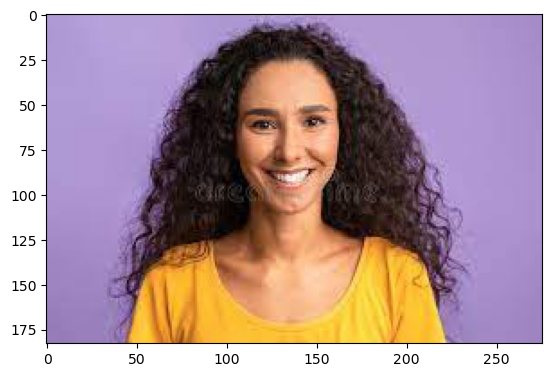

In [5]:
img = cv2.imread(r"C:\Users\PRATHAMESH MANDIYE\OneDrive\Desktop\Testing\happyperson.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
image_path_to_classify = r"C:\Users\PRATHAMESH MANDIYE\OneDrive\Desktop\Testing\happyperson.jpg"#r"D:\ML(imp)\NOtes and projecTS\Image classification\sadtestt.jpg"
result = classify_image(image_path_to_classify)
print(f"Predicted: {result}")

1/1 [==============================] - 0s 105ms/step
[0.04336262]
Predicted: Happy
